## Step 1: Load the wind mast 1 Data and Check Columns with python libraries

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
M1 = pd.read_csv('/Users/niki/Documents/Nishu/Mtech_Files/Mast1_zone42_wgs84_473066_2600838.csv')
M1

,Date/Time,Mast1~WS125A~Mean,Mast1~WS125A~StdDev,Mast1~WS125A~Min,Mast1~WS125A~Max,Mast1~WS125A~Flag,Mast1~WS125B~Mean,Mast1~WS125B~StdDev,Mast1~WS125B~Min,Mast1~WS125B~Max,...,Mast1~WD98~Min,Mast1~WD98~Max,Mast1~P75~Mean,Mast1~P75~StdDev,Mast1~P75~Min,Mast1~P75~Max,Mast1~T75~Mean,Mast1~T75~StdDev,Mast1~T75~Min,Mast1~T75~Max
0,02-01-2012 18:50,6.054,0.102,2.1,6.2,0.006,6.070,0.145,1.9,6.4,...,26.7,30.9,1001.3,0.272,1000.2,1001.8,19.3,0.465,18.6,19.9
1,02-01-2012 19:00,6.164,0.000,5.9,6.3,0.006,6.183,0.102,5.9,6.3,...,22.5,28.1,1001.5,0.272,1001.3,1001.8,19.0,0.379,18.4,19.8
2,02-01-2012 19:10,6.192,0.102,6.0,6.3,0.006,6.222,0.000,5.9,6.5,...,21.1,23.9,1001.8,0.272,1001.5,1002.1,18.7,0.509,18.2,19.7
3,02-01-2012 19:20,6.263,0.102,6.0,6.5,0.002,6.288,0.145,6.0,6.5,...,21.1,25.3,1002.1,0.272,1001.5,1002.3,18.3,0.240,18.0,18.8
4,02-01-2012 19:30,6.102,0.102,5.9,6.3,0.002,6.125,0.102,5.9,6.3,...,22.5,26.7,1002.1,0.272,1001.8,1002.3,18.6,0.427,18.1,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199250,17-10-2015 11:10,4.354,0.702,2.6,6.1,0.100,4.305,0.800,2.8,6.6,...,309.4,71.7,1000.2,0.272,999.9,1001.0,32.8,0.545,32.3,34.1
199251,17-10-2015 11:20,4.359,0.664,2.9,5.7,0.082,4.187,0.746,2.5,6.5,...,270.0,57.7,1000.2,0.272,999.9,1000.7,32.9,0.310,32.4,33.6
199252,17-10-2015 11:30,4.427,0.813,2.6,6.3,0.098,4.265,0.944,2.3,6.6,...,309.4,123.8,1000.2,0.272,999.9,1000.5,33.4,0.550,32.8,34.7
199253,17-10-2015 11:40,4.188,0.702,2.5,6.1,0.114,4.084,0.773,1.9,6.2,...,315.0,56.3,999.9,0.272,999.4,1000.2,33.8,0.475,33.4,35.2


## Step 2: Normalize column names: replace '~' with '_', remove other special characters, and lowercase everything

In [487]:
M1.columns = (M1.columns
              .str.replace('~', '_', regex=False)  # Replace '~' with '_'
              .str.replace('[^A-Za-z0-9]+', '_', regex=True)  # Replace any other special characters with '_'
              .str.lower()  # Convert to lowercase
             )
M1 = M1.loc[:, ~M1.columns.str.contains('flag')]
M1.columns

Index(['date_time', 'mast1_ws125a_mean', 'mast1_ws125a_stddev',
       'mast1_ws125a_min', 'mast1_ws125a_max', 'mast1_ws125b_mean',
       'mast1_ws125b_stddev', 'mast1_ws125b_min', 'mast1_ws125b_max',
       'mast1_ws100_mean', 'mast1_ws100_stddev', 'mast1_ws100_min',
       'mast1_ws100_max', 'mast1_ws93_mean', 'mast1_ws93_stddev',
       'mast1_ws93_min', 'mast1_ws93_max', 'mast1_ws75_mean',
       'mast1_ws75_stddev', 'mast1_ws75_min', 'mast1_ws75_max',
       'mast1_ws50_mean', 'mast1_ws50_stddev', 'mast1_ws50_min',
       'mast1_ws50_max', 'mast1_wd123_mean', 'mast1_wd123_stddev',
       'mast1_wd123_min', 'mast1_wd123_max', 'mast1_wd98_mean',
       'mast1_wd98_stddev', 'mast1_wd98_min', 'mast1_wd98_max',
       'mast1_p75_mean', 'mast1_p75_stddev', 'mast1_p75_min', 'mast1_p75_max',
       'mast1_t75_mean', 'mast1_t75_stddev', 'mast1_t75_min', 'mast1_t75_max'],
      dtype='object')

In [488]:
M1.describe()

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
count,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,...,199255.000000,199255.000000,199255.000000,199255.00000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000,199255.000000
mean,2172.806281,2166.109154,2171.348169,2174.079067,4946.394126,4939.898454,4944.979901,4947.636700,26120.340119,26115.462718,...,7356.473377,7371.909946,1506.716686,519.19564,1506.323650,1507.073754,545.438835,519.324885,544.966571,546.306633
std,14554.462505,14555.458679,14554.679424,14554.273197,21667.155955,21668.636496,21667.478320,21666.872744,43922.810341,43925.710035,...,25750.502306,25746.235886,7113.590610,7184.91195,7113.619019,7113.564811,7189.997409,7184.902617,7190.031542,7189.934718
min,0.303000,0.000000,0.000000,0.000000,0.303000,0.000000,0.000000,0.000000,0.303000,0.000000,...,0.000000,0.000000,976.500000,0.00000,969.100000,977.100000,7.200000,0.000000,7.000000,7.500000
25%,5.722000,0.251000,4.400000,6.700000,5.768000,0.271000,4.400000,6.800000,6.136000,0.397000,...,194.100000,133.600000,988.500000,0.27200,988.000000,988.800000,23.600000,0.277000,23.100000,24.400000
50%,7.349000,0.579000,6.000000,8.600000,7.432000,0.597000,6.000000,8.700000,8.171000,0.780000,...,236.300000,264.400000,993.800000,0.27200,993.300000,994.100000,26.300000,0.410000,25.800000,27.200000
75%,9.154000,0.857000,7.600000,10.700000,9.355000,0.881000,7.800000,10.900000,99999.000000,99999.000000,...,270.000000,295.300000,997.500000,0.27200,997.300000,998.100000,28.200000,0.528000,27.700000,29.200000
max,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


## Step 3: Now, we will check if the 'date_time' column is present in the DataFrame and convert it to the proper datetime format.
Drop all rows with null datetime values

In [489]:
M1['date_time'] = pd.to_datetime(M1['date_time'], errors='coerce')
M1 = M1.dropna(subset=['date_time'])
M1 = M1.set_index('date_time')
M1

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
date_time,,,,,,,,,,,,,,,,,,,,,
2012-02-01 18:50:00,6.054,0.102,2.1,6.2,6.070,0.145,1.9,6.4,5.972,0.145,...,26.7,30.9,1001.3,0.272,1000.2,1001.8,19.3,0.465,18.6,19.9
2012-02-01 19:00:00,6.164,0.000,5.9,6.3,6.183,0.102,5.9,6.3,6.026,0.000,...,22.5,28.1,1001.5,0.272,1001.3,1001.8,19.0,0.379,18.4,19.8
2012-02-01 19:10:00,6.192,0.102,6.0,6.3,6.222,0.000,5.9,6.5,6.188,0.000,...,21.1,23.9,1001.8,0.272,1001.5,1002.1,18.7,0.509,18.2,19.7
2012-02-01 19:20:00,6.263,0.102,6.0,6.5,6.288,0.145,6.0,6.5,6.298,0.102,...,21.1,25.3,1002.1,0.272,1001.5,1002.3,18.3,0.240,18.0,18.8
2012-02-01 19:30:00,6.102,0.102,5.9,6.3,6.125,0.102,5.9,6.3,6.082,0.102,...,22.5,26.7,1002.1,0.272,1001.8,1002.3,18.6,0.427,18.1,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-10 23:10:00,4.428,0.271,4.0,5.2,4.482,0.229,4.1,4.9,3.885,0.229,...,312.2,315.0,996.2,0.272,995.9,996.5,25.5,0.155,25.4,25.8
2015-12-10 23:20:00,4.762,0.229,4.4,5.2,4.819,0.205,4.5,5.4,4.252,0.205,...,315.0,317.8,996.2,0.272,995.9,996.5,25.8,0.277,25.4,26.4
2015-12-10 23:30:00,4.685,0.205,4.4,5.1,4.764,0.205,4.5,5.6,4.249,0.205,...,305.2,317.8,996.2,0.272,995.9,996.5,25.8,0.514,25.3,27.0


## Step 4: Remove Negative Values

We'll drop rows where any column contains negative values.

In [490]:
M1 = M1[(M1 >= 0).all(axis=1)]
M1

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
date_time,,,,,,,,,,,,,,,,,,,,,
2012-02-01 18:50:00,6.054,0.102,2.1,6.2,6.070,0.145,1.9,6.4,5.972,0.145,...,26.7,30.9,1001.3,0.272,1000.2,1001.8,19.3,0.465,18.6,19.9
2012-02-01 19:00:00,6.164,0.000,5.9,6.3,6.183,0.102,5.9,6.3,6.026,0.000,...,22.5,28.1,1001.5,0.272,1001.3,1001.8,19.0,0.379,18.4,19.8
2012-02-01 19:10:00,6.192,0.102,6.0,6.3,6.222,0.000,5.9,6.5,6.188,0.000,...,21.1,23.9,1001.8,0.272,1001.5,1002.1,18.7,0.509,18.2,19.7
2012-02-01 19:20:00,6.263,0.102,6.0,6.5,6.288,0.145,6.0,6.5,6.298,0.102,...,21.1,25.3,1002.1,0.272,1001.5,1002.3,18.3,0.240,18.0,18.8
2012-02-01 19:30:00,6.102,0.102,5.9,6.3,6.125,0.102,5.9,6.3,6.082,0.102,...,22.5,26.7,1002.1,0.272,1001.8,1002.3,18.6,0.427,18.1,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-10 23:10:00,4.428,0.271,4.0,5.2,4.482,0.229,4.1,4.9,3.885,0.229,...,312.2,315.0,996.2,0.272,995.9,996.5,25.5,0.155,25.4,25.8
2015-12-10 23:20:00,4.762,0.229,4.4,5.2,4.819,0.205,4.5,5.4,4.252,0.205,...,315.0,317.8,996.2,0.272,995.9,996.5,25.8,0.277,25.4,26.4
2015-12-10 23:30:00,4.685,0.205,4.4,5.1,4.764,0.205,4.5,5.6,4.249,0.205,...,305.2,317.8,996.2,0.272,995.9,996.5,25.8,0.514,25.3,27.0


## Step 5: Remove Outliers

Remove outliers that are far from the normal range.

In [491]:
# Replacing outlier with Nan values
M1.replace(99999.000000, np.nan, inplace=True)

# Define function to remove outliers
def remove_outliers(df, low_quantile=0.01, high_quantile=0.99):
    low = df.quantile(low_quantile)
    high = df.quantile(high_quantile)
    return df[(df >= low) & (df <= high)]

# Apply the outlier removal function
M1 = remove_outliers(M1)

#Fill na if there are any empty columns
M1.fillna(M1.mean(), inplace=True)
M1.dropna(inplace=True)
M1

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
date_time,,,,,,,,,,,,,,,,,,,,,
2012-02-01 18:50:00,6.054,0.102,2.1,6.2,6.070,0.145,1.9,6.4,5.972,0.145,...,26.7,30.9,1001.3,0.272,1000.2,1001.8,19.3,0.465,18.6,19.9
2012-02-01 19:00:00,6.164,0.000,5.9,6.3,6.183,0.102,5.9,6.3,6.026,0.000,...,22.5,28.1,1001.5,0.272,1001.3,1001.8,19.0,0.379,18.4,19.8
2012-02-01 19:10:00,6.192,0.102,6.0,6.3,6.222,0.000,5.9,6.5,6.188,0.000,...,21.1,23.9,1001.8,0.272,1001.5,1002.1,18.7,0.509,18.2,19.7
2012-02-01 19:20:00,6.263,0.102,6.0,6.5,6.288,0.145,6.0,6.5,6.298,0.102,...,21.1,25.3,1002.1,0.272,1001.5,1002.3,18.3,0.240,18.0,18.8
2012-02-01 19:30:00,6.102,0.102,5.9,6.3,6.125,0.102,5.9,6.3,6.082,0.102,...,22.5,26.7,1002.1,0.272,1001.8,1002.3,18.6,0.427,18.1,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-10 23:10:00,4.428,0.271,4.0,5.2,4.482,0.229,4.1,4.9,3.885,0.229,...,312.2,315.0,996.2,0.272,995.9,996.5,25.5,0.155,25.4,25.8
2015-12-10 23:20:00,4.762,0.229,4.4,5.2,4.819,0.205,4.5,5.4,4.252,0.205,...,315.0,317.8,996.2,0.272,995.9,996.5,25.8,0.277,25.4,26.4
2015-12-10 23:30:00,4.685,0.205,4.4,5.1,4.764,0.205,4.5,5.6,4.249,0.205,...,305.2,317.8,996.2,0.272,995.9,996.5,25.8,0.514,25.3,27.0


## Aggregate Data by 1 hour

In [492]:
M1_BY_Hour = M1.resample('H').mean()
M1_BY_Hour

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,12.458500,0.137833,8.884365,12.633333,12.601167,0.136000,6.788544,12.800000,10.982500,0.177167,...,22.733333,27.400000,994.584586,0.272000,995.913461,998.416671,18.850000,0.439667,18.350000,19.700000
2012-01-02 01:00:00,11.931833,0.254167,11.250000,12.400000,12.012167,0.260167,11.316667,12.500000,10.450667,0.286833,...,30.216667,39.166667,1002.750000,0.272000,1002.366667,1003.066667,18.300000,0.400667,17.833333,19.166667
2012-01-02 02:00:00,11.855833,0.255500,11.083333,12.433333,11.966500,0.245000,11.250000,12.550000,10.455667,0.272500,...,24.366667,33.533333,1002.700000,0.272000,1002.233333,1003.000000,17.850000,0.392500,17.433333,18.766667
2012-01-02 03:00:00,12.766333,0.292500,8.651032,13.316667,11.815934,0.299500,8.679793,13.483333,11.095333,0.222333,...,22.500000,29.033333,1002.400000,0.272000,1002.083333,1002.783333,17.066667,0.410333,16.566667,17.866667
2012-01-02 04:00:00,12.961833,0.260500,7.595820,13.616667,12.003767,0.267500,7.584169,13.733333,11.504667,0.288667,...,23.433333,32.583333,1002.400000,0.272000,1002.066667,1002.700000,16.933333,0.347833,16.500000,17.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-10 19:00:00,4.757833,0.518833,3.633333,5.783333,4.841167,0.519000,3.633333,5.883333,4.494333,0.530000,...,259.716667,282.666667,995.100000,0.272000,994.800000,995.550000,27.616667,0.417500,27.166667,28.483333
2015-12-10 20:00:00,5.362000,0.381833,4.300000,6.116667,5.472000,0.388500,4.366667,6.283333,4.787167,0.437500,...,264.866667,288.766667,995.350000,0.226667,994.966667,995.633333,26.916667,0.449333,26.383333,27.816667
2015-12-10 21:00:00,5.731333,0.224333,5.016667,6.166667,5.844833,0.239333,5.033333,6.416667,5.128000,0.339833,...,274.433333,294.133333,995.800000,0.272000,995.350000,996.100000,26.200000,0.277667,25.850000,26.783333


# lambda function to create a new column that categorizes numerical data into bins

In [493]:
bins = [0, 5, 10, float('inf')]  
labels = ['Low', 'Medium', 'High'] 
M1_BY_Hour['wind_speed_category'] = M1_BY_Hour[['mast1_ws125a_mean','mast1_ws125b_mean','mast1_ws100_mean','mast1_ws93_mean','mast1_ws75_mean','mast1_ws50_mean']].mean(axis=1).apply(lambda x: pd.cut([x], bins=bins, labels=labels)[0])
print(M1_BY_Hour[['mast1_ws125a_mean','mast1_ws125b_mean','mast1_ws100_mean','mast1_ws93_mean','mast1_ws75_mean','mast1_ws50_mean', 'wind_speed_category']].head())

                     mast1_ws125a_mean  mast1_ws125b_mean  mast1_ws100_mean  \
date_time                                                                     
2012-01-02 00:00:00          12.458500          12.601167         10.982500   
2012-01-02 01:00:00          11.931833          12.012167         10.450667   
2012-01-02 02:00:00          11.855833          11.966500         10.455667   
2012-01-02 03:00:00          12.766333          11.815934         11.095333   
2012-01-02 04:00:00          12.961833          12.003767         11.504667   

                     mast1_ws93_mean  mast1_ws75_mean  mast1_ws50_mean  \
date_time                                                                
2012-01-02 00:00:00        10.360000         9.628500         8.188500   
2012-01-02 01:00:00         9.836000         9.162500         7.836000   
2012-01-02 02:00:00         9.965833         9.306833         8.063000   
2012-01-02 03:00:00        10.536167         9.908833         8.595667   
20

# Calculating turbulance intensity


In [494]:
M1_BY_Hour['TI_ws125a'] = M1_BY_Hour.apply(lambda x: x['mast1_ws125a_stddev'] / x['mast1_ws125a_mean'] if x['mast1_ws125a_mean'] != 0 else np.nan, axis=1)
M1_BY_Hour['TI_ws125b'] = M1_BY_Hour.apply(lambda x: x['mast1_ws125b_stddev'] / x['mast1_ws125b_mean'] if x['mast1_ws125b_mean'] != 0 else np.nan, axis=1)
M1_BY_Hour['TI_ws100'] = M1_BY_Hour.apply(lambda x: x['mast1_ws100_stddev'] / x['mast1_ws100_mean'] if x['mast1_ws100_mean'] != 0 else np.nan, axis=1)
M1_BY_Hour['TI_ws93'] = M1_BY_Hour.apply(lambda x: x['mast1_ws93_stddev'] / x['mast1_ws93_mean'] if x['mast1_ws93_mean'] != 0 else np.nan, axis=1)
M1_BY_Hour['TI_ws75'] = M1_BY_Hour.apply(lambda x: x['mast1_ws75_stddev'] / x['mast1_ws75_mean'] if x['mast1_ws75_mean'] != 0 else np.nan, axis=1)
M1_BY_Hour['TI_ws50'] = M1_BY_Hour.apply(lambda x: x['mast1_ws50_stddev'] / x['mast1_ws50_mean'] if x['mast1_ws50_mean'] != 0 else np.nan, axis=1)


print(M1_BY_Hour[['TI_ws125a', 'TI_ws125b', 'TI_ws100', 'TI_ws93', 'TI_ws75', 'TI_ws50']].head())

                     TI_ws125a  TI_ws125b  TI_ws100   TI_ws93   TI_ws75  \
date_time                                                                 
2012-01-02 00:00:00   0.011063   0.010793  0.016132  0.017857  0.020322   
2012-01-02 01:00:00   0.021302   0.021659  0.027446  0.030399  0.030596   
2012-01-02 02:00:00   0.021551   0.020474  0.026062  0.025638  0.027220   
2012-01-02 03:00:00   0.022912   0.025347  0.020038  0.020058  0.023969   
2012-01-02 04:00:00   0.020097   0.022285  0.025091  0.025001  0.026726   

                      TI_ws50  
date_time                      
2012-01-02 00:00:00  0.020822  
2012-01-02 01:00:00  0.029777  
2012-01-02 02:00:00  0.027078  
2012-01-02 03:00:00  0.022725  
2012-01-02 04:00:00  0.028101  


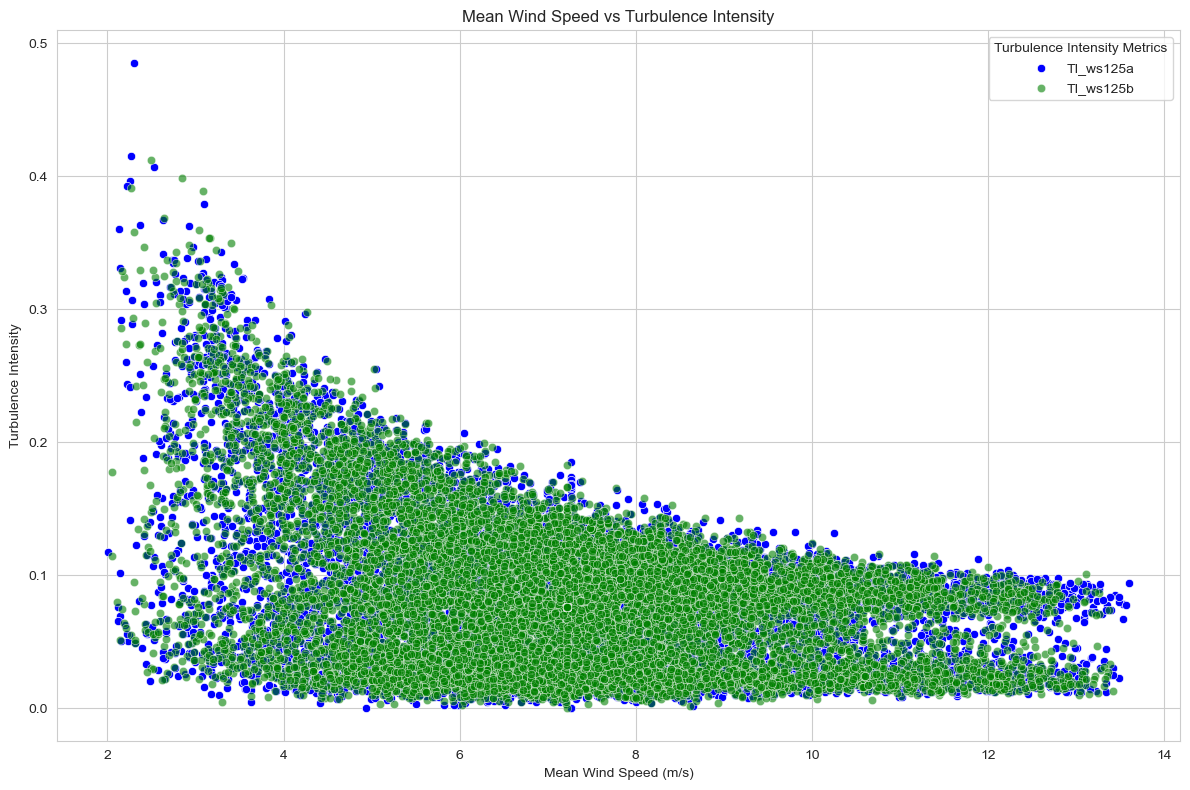

In [499]:
# Prepare the DataFrame for plotting
# Create a new DataFrame for easier plotting
plot_data = M1_BY_Hour[['mast1_ws125a_mean', 'TI_ws125a',
                         'mast1_ws125b_mean', 'TI_ws125b',
                         'mast1_ws100_mean', 'TI_ws100',
                         'mast1_ws93_mean', 'TI_ws93',
                         'mast1_ws75_mean', 'TI_ws75',
                         'mast1_ws50_mean', 'TI_ws50']]

# Melt the DataFrame to have a long format for easier plotting
plot_data = plot_data.melt(id_vars=[], 
                            value_vars=['mast1_ws125a_mean', 'TI_ws125a',
                                        'mast1_ws125b_mean', 'TI_ws125b',
                                        'mast1_ws100_mean', 'TI_ws100',
                                        'mast1_ws93_mean', 'TI_ws93',
                                        'mast1_ws75_mean', 'TI_ws75',
                                        'mast1_ws50_mean', 'TI_ws50'],
                            var_name='Variable', value_name='Value')

# Separate mean wind speeds and turbulence intensities
plot_data['Type'] = plot_data['Variable'].apply(lambda x: 'Mean Wind Speed' if 'mean' in x else 'Turbulence Intensity')

# Pivot for easy plotting
pivot_data = plot_data.pivot_table(index='Type', 
                                    columns='Variable', 
                                    values='Value')

# Create scatter plot using seaborn
plt.figure(figsize=(12, 8))

# Scatter plot for each combination
sns.scatterplot(data=M1_BY_Hour, x='mast1_ws125a_mean', y='TI_ws125a', color='blue', label='TI_ws125a')
sns.scatterplot(data=M1_BY_Hour, x='mast1_ws125b_mean', y='TI_ws125b', color='green',alpha = 0.6, label='TI_ws125b')
#sns.scatterplot(data=M1_BY_Hour, x='mast1_ws100_mean', y='TI_ws100', color='red',alpha = 0.5, label='TI_ws100')
#sns.scatterplot(data=M1_BY_Hour, x='mast1_ws93_mean', y='TI_ws93', color='purple',alpha = 0.4, label='TI_ws93')
#sns.scatterplot(data=M1_BY_Hour, x='mast1_ws75_mean', y='TI_ws75', color='orange',alpha = 0.3, label='TI_ws75')
#sns.scatterplot(data=M1_BY_Hour, x='mast1_ws50_mean', y='TI_ws50', color='brown',alpha = 0.2, label='TI_ws50')

# Adding labels and title
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Turbulence Intensity')
plt.title('Mean Wind Speed vs Turbulence Intensity')
plt.legend(title='Turbulence Intensity Metrics')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the figure area
plt.show()

# Grouping the data by months

In [477]:
M1_by_month = M1.groupby(M1.index.strftime('%m')).mean()
M1_by_month

,mast1_ws125a_mean,mast1_ws125a_stddev,mast1_ws125a_min,mast1_ws125a_max,mast1_ws125b_mean,mast1_ws125b_stddev,mast1_ws125b_min,mast1_ws125b_max,mast1_ws100_mean,mast1_ws100_stddev,...,mast1_wd98_min,mast1_wd98_max,mast1_p75_mean,mast1_p75_stddev,mast1_p75_min,mast1_p75_max,mast1_t75_mean,mast1_t75_stddev,mast1_t75_min,mast1_t75_max
date_time,,,,,,,,,,,,,,,,,,,,,
01,7.738839,0.586159,6.171658,9.107833,7.665013,0.585291,6.135281,8.996163,7.184526,0.587319,...,185.745615,207.002032,992.570092,0.270268,992.163569,992.934182,25.688218,0.398766,25.213560,26.561740
02,7.318004,0.559993,5.782783,8.617369,7.204246,0.563035,5.733295,8.503818,6.970885,0.579112,...,193.471389,211.866316,992.952802,0.269829,992.545041,993.307183,25.911105,0.398653,25.435209,26.779758
03,7.400416,0.570816,5.869104,8.696632,7.309269,0.567035,5.837528,8.549056,7.064458,0.589950,...,198.302843,215.549301,992.793082,0.269997,992.415007,993.170149,25.675276,0.394885,25.189848,26.543020
04,7.396520,0.568414,5.887066,8.659384,7.348796,0.567105,5.819577,8.635068,7.115626,0.582129,...,210.509615,226.848400,992.840271,0.268966,992.446127,993.205958,25.690807,0.397038,25.223614,26.566795
05,7.173878,0.542392,5.726299,8.424431,7.148015,0.535263,5.657652,8.415557,7.040689,0.567263,...,200.643751,219.264845,992.738928,0.268327,992.341521,993.106532,25.596941,0.394277,25.140210,26.471730
06,7.231700,0.549068,5.792827,8.467626,7.200113,0.544864,5.724030,8.487191,7.148272,0.573412,...,203.173785,221.511125,993.033484,0.268486,992.670885,993.367583,25.545498,0.394788,25.079998,26.416796
07,7.161128,0.531150,5.695062,8.390081,7.108906,0.531733,5.648132,8.361112,7.018355,0.558103,...,211.346261,226.289857,993.037416,0.268439,992.677520,993.367955,25.577750,0.397521,25.115226,26.441043
08,7.029077,0.528868,5.605737,8.236613,6.968461,0.536374,5.536535,8.231503,6.803659,0.548443,...,203.956993,213.782505,993.091813,0.267440,992.710969,993.438411,25.454972,0.394574,24.991778,26.337716
09,7.305178,0.557331,5.773987,8.561042,7.237518,0.555567,5.712484,8.511834,6.769319,0.556351,...,185.142041,204.437217,992.914459,0.268064,992.536869,993.276716,25.429222,0.391575,24.970703,26.280741


## Step 6: Final Check for Missing Values(using list comprehension)

Finally, check for any remaining missing values in the cleaned data.

In [381]:
columns_with_missing = [col for col in M1.columns if M1[col].isnull().any()]
print(columns_with_missing)


[]


# Reference data from satellite MERRA2

# OFFSITE DATA

In [332]:
MERRA2_C_offsite = pd.read_csv('/Users/niki/Documents/Nishu/Mtech_Files/MERRA2_C_offsite.csv')
MERRA2_C_offsite.columns = (MERRA2_C_offsite.columns
              .str.replace('~', '_', regex=False)  # Replace '~' with '_'
              .str.replace('[^A-Za-z0-9]+', '_', regex=True)  # Replace any other special characters with '_'
              .str.lower()  # Convert to lowercase
             )
MERRA2_C_offsite



,date_time,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
0,1996-01-01 06:00,7.1281,59.5910,11.431,989.616
1,1996-01-01 07:00,6.9543,60.3434,11.104,990.382
2,1996-01-01 08:00,6.8910,60.7018,11.553,991.098
3,1996-01-01 09:00,5.6506,61.2046,14.008,991.644
4,1996-01-01 10:00,4.5406,56.5156,16.626,992.220
...,...,...,...,...,...
249811,2024-07-01 01:00,7.8603,196.9070,30.203,969.071
249812,2024-07-01 02:00,7.5974,202.0720,29.872,968.403
249813,2024-07-01 03:00,7.3559,205.9630,29.598,967.952
249814,2024-07-01 04:00,7.1070,207.4320,29.330,967.755


In [384]:
MERRA2_C_offsite['date_time'] = pd.to_datetime(MERRA2_C_offsite['date_time'], errors='coerce')
MERRA2_C_offsite = MERRA2_C_offsite.dropna(subset=['date_time'])
MERRA2_C_offsite = MERRA2_C_offsite.set_index('date_time')
MERRA2_C_offsite

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
1996-01-01 06:00:00,7.1281,59.5910,11.431,989.616
1996-01-01 07:00:00,6.9543,60.3434,11.104,990.382
1996-01-01 08:00:00,6.8910,60.7018,11.553,991.098
1996-01-01 09:00:00,5.6506,61.2046,14.008,991.644
1996-01-01 10:00:00,4.5406,56.5156,16.626,992.220
...,...,...,...,...
2024-07-01 01:00:00,7.8603,196.9070,30.203,969.071
2024-07-01 02:00:00,7.5974,202.0720,29.872,968.403
2024-07-01 03:00:00,7.3559,205.9630,29.598,967.952


In [403]:
MERRA2_C_offsite = MERRA2_C_offsite[(MERRA2_C_offsite >= 0).all(axis=1)]
MERRA2_C_offsite

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
1996-01-01 06:00:00,7.1281,59.5910,11.431,989.616
1996-01-01 07:00:00,6.9543,60.3434,11.104,990.382
1996-01-01 08:00:00,6.8910,60.7018,11.553,991.098
1996-01-01 09:00:00,5.6506,61.2046,14.008,991.644
1996-01-01 10:00:00,4.5406,56.5156,16.626,992.220
...,...,...,...,...
2024-07-01 01:00:00,7.8603,196.9070,30.203,969.071
2024-07-01 02:00:00,7.5974,202.0720,29.872,968.403
2024-07-01 03:00:00,7.3559,205.9630,29.598,967.952


In [404]:
Merraoff_by_month = MERRA2_C_offsite.groupby(MERRA2_C_offsite.index.strftime('%m')).mean()
Merraoff_by_month

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
01,4.783588,117.402057,3465.075747,4402.725839
02,9.848683,148.613819,3434.075843,4366.637023
03,4.717557,180.499518,3473.318546,4396.961941
04,5.235636,213.254764,3478.429770,4393.325736
05,6.705745,224.838949,3481.150775,4389.467293
06,7.210940,209.323364,3481.433160,4386.027263
07,16.225837,204.250503,3602.012400,4506.094975
08,5.989565,199.216475,3601.552591,4509.168986
09,5.173988,192.610807,3600.977553,4512.926303


# SITE DATA

In [390]:
MERRA2_C_site = pd.read_csv('/Users/niki/Documents/Nishu/Mtech_Files/MERRA2_C_site.csv')
MERRA2_C_site.columns = (MERRA2_C_site.columns
              .str.replace('~', '_', regex=False)  # Replace '~' with '_'
              .str.replace('[^A-Za-z0-9]+', '_', regex=True)  # Replace any other special characters with '_'
              .str.lower()  # Convert to lowercase
             )
MERRA2_C_site

,date_time,merra_2_c_sp0_mean,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean
0,1996-01-01 06:00,1012.980,8.3253,36.9201,14.657
1,1996-01-01 07:00,1013.580,7.9748,39.3191,14.331
2,1996-01-01 08:00,1014.380,7.4100,42.0656,14.678
3,1996-01-01 09:00,1015.320,5.9059,41.9242,16.133
4,1996-01-01 10:00,1016.140,5.2128,38.7750,18.837
...,...,...,...,...,...
250555,2024-08-01 01:00,995.959,9.0857,211.6560,27.575
250556,2024-08-01 02:00,995.475,9.1128,211.9580,27.498
250557,2024-08-01 03:00,995.219,8.6561,212.4650,27.425
250558,2024-08-01 04:00,995.192,8.1475,214.6740,27.368


In [391]:
MERRA2_C_site['date_time'] = pd.to_datetime(MERRA2_C_site['date_time'], errors='coerce')
MERRA2_C_site = MERRA2_C_site.dropna(subset=['date_time'])
MERRA2_C_site = MERRA2_C_site.set_index('date_time')
MERRA2_C_site

,merra_2_c_sp0_mean,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean
date_time,,,,
1996-01-01 06:00:00,1012.980,8.3253,36.9201,14.657
1996-01-01 07:00:00,1013.580,7.9748,39.3191,14.331
1996-01-01 08:00:00,1014.380,7.4100,42.0656,14.678
1996-01-01 09:00:00,1015.320,5.9059,41.9242,16.133
1996-01-01 10:00:00,1016.140,5.2128,38.7750,18.837
...,...,...,...,...
2024-08-01 01:00:00,995.959,9.0857,211.6560,27.575
2024-08-01 02:00:00,995.475,9.1128,211.9580,27.498
2024-08-01 03:00:00,995.219,8.6561,212.4650,27.425


In [392]:
MERRA2_C_site = MERRA2_C_site[(MERRA2_C_site >= 0).all(axis=1)]
MERRA2_C_site

,merra_2_c_sp0_mean,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean
date_time,,,,
1996-01-01 06:00:00,1012.980,8.3253,36.9201,14.657
1996-01-01 07:00:00,1013.580,7.9748,39.3191,14.331
1996-01-01 08:00:00,1014.380,7.4100,42.0656,14.678
1996-01-01 09:00:00,1015.320,5.9059,41.9242,16.133
1996-01-01 10:00:00,1016.140,5.2128,38.7750,18.837
...,...,...,...,...
2024-08-01 01:00:00,995.959,9.0857,211.6560,27.575
2024-08-01 02:00:00,995.475,9.1128,211.9580,27.498
2024-08-01 03:00:00,995.219,8.6561,212.4650,27.425


In [405]:
Merrasite_by_month = MERRA2_C_site.groupby(MERRA2_C_site.index.strftime('%m')).mean()
Merrasite_by_month

,merra_2_c_sp0_mean,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean
date_time,,,,
01,4425.955253,5.508519,140.491564,3468.298591
02,4390.125455,5.639129,201.239043,3436.267770
03,4420.826327,5.950522,248.338591,3473.541890
04,4417.820563,6.835189,258.454293,3476.186099
05,4414.570312,8.401888,246.795918,3477.314319
06,4410.632151,8.387321,233.391696,3477.805296
07,4409.696485,8.581250,238.999044,3476.587785
08,4532.671116,7.931930,242.757151,3597.495122
09,4537.091408,6.407907,245.555678,3598.563283


# VERY FAROFFSITE DATA

In [394]:
MERRA2_C_very_faroffsite = pd.read_csv('/Users/niki/Documents/Nishu/Mtech_Files/MERRA2_C_very_faroffsite.csv')
MERRA2_C_very_faroffsite.columns = (MERRA2_C_very_faroffsite.columns
              .str.replace('~', '_', regex=False)  # Replace '~' with '_'
              .str.replace('[^A-Za-z0-9]+', '_', regex=True)  # Replace any other special characters with '_'
              .str.lower()  # Convert to lowercase
             )
MERRA2_C_very_faroffsite

,date_time,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
0,1996-01-01 06:00,4.3737,32.1319,18.095,981.936
1,1996-01-01 07:00,4.5690,46.2801,17.885,982.542
2,1996-01-01 08:00,4.0795,60.4133,19.444,983.018
3,1996-01-01 09:00,2.6023,48.1729,22.328,983.484
4,1996-01-01 10:00,1.7131,31.4560,24.993,983.740
...,...,...,...,...,...
248347,2024-05-01 01:00,2.5752,247.4420,26.718,975.442
248348,2024-05-01 02:00,2.3436,248.3330,26.292,974.792
248349,2024-05-01 03:00,2.2089,250.4190,25.970,974.439
248350,2024-05-01 04:00,1.9677,251.0100,25.712,974.444


In [396]:
MERRA2_C_very_faroffsite['date_time'] = pd.to_datetime(MERRA2_C_very_faroffsite['date_time'], errors='coerce')
MERRA2_C_very_faroffsite = MERRA2_C_very_faroffsite.dropna(subset=['date_time'])
MERRA2_C_very_faroffsite = MERRA2_C_very_faroffsite.set_index('date_time')
MERRA2_C_very_faroffsite

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
1996-01-01 06:00:00,4.3737,32.1319,18.095,981.936
1996-01-01 07:00:00,4.5690,46.2801,17.885,982.542
1996-01-01 08:00:00,4.0795,60.4133,19.444,983.018
1996-01-01 09:00:00,2.6023,48.1729,22.328,983.484
1996-01-01 10:00:00,1.7131,31.4560,24.993,983.740
...,...,...,...,...
2024-05-01 01:00:00,2.5752,247.4420,26.718,975.442
2024-05-01 02:00:00,2.3436,248.3330,26.292,974.792
2024-05-01 03:00:00,2.2089,250.4190,25.970,974.439


In [397]:
MERRA2_C_very_faroffsite = MERRA2_C_very_faroffsite[(MERRA2_C_very_faroffsite >= 0).all(axis=1)]
MERRA2_C_very_faroffsite

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
1996-01-01 06:00:00,4.3737,32.1319,18.095,981.936
1996-01-01 07:00:00,4.5690,46.2801,17.885,982.542
1996-01-01 08:00:00,4.0795,60.4133,19.444,983.018
1996-01-01 09:00:00,2.6023,48.1729,22.328,983.484
1996-01-01 10:00:00,1.7131,31.4560,24.993,983.740
...,...,...,...,...
2024-05-01 01:00:00,2.5752,247.4420,26.718,975.442
2024-05-01 02:00:00,2.3436,248.3330,26.292,974.792
2024-05-01 03:00:00,2.2089,250.4190,25.970,974.439


In [406]:
Merravfaroff_by_month = MERRA2_C_very_faroffsite.groupby(MERRA2_C_very_faroffsite.index.strftime('%m')).mean()
Merravfaroff_by_month

,merra_2_c_ws50_mean,merra_2_c_wd50_mean,merra_2_c_t10_mean,merra_2_c_sp0_mean
date_time,,,,
01,4.608879,164.176705,3472.851315,4395.719156
02,4.370073,186.515078,3440.008676,4360.884104
03,4.054023,216.340861,3475.482759,4392.795586
04,3.881185,252.264287,3476.823830,4391.391184
05,4.770936,275.335369,3598.382234,4511.209722
06,6.812916,251.205341,3596.913394,4510.836549
07,7.970806,256.800656,3595.627550,4511.091250
08,7.132655,265.390122,3595.281054,4512.024531
09,5.200601,261.923521,3595.419853,4512.665613


# Correlation of mast and reference data

In [416]:
M1_by_month['date_time'] = pd.to_datetime(M1_by_month.index, errors='coerce')
Merraoff_by_month['date_time'] = pd.to_datetime(Merraoff_by_month.index, errors='coerce')
Merravfaroff_by_month['date_time'] = pd.to_datetime(Merravfaroff_by_month.index, errors='coerce')
Merrasite_by_month['date_time'] = pd.to_datetime(Merrasite_by_month.index, errors='coerce')

In [417]:

M1_by_month.reset_index(drop=True, inplace=True)
Merraoff_by_month.reset_index(drop=True, inplace=True)
Merravfaroff_by_month.reset_index(drop=True, inplace=True)
Merrasite_by_month.reset_index(drop=True, inplace=True)

combined_data = pd.DataFrame({
    'M1_WS50_mean': M1_by_month['mast1_ws50_mean'],  
    'MerraOff_WS50_mean': Merraoff_by_month['merra_2_c_ws50_mean'],
    'MerravfarOff_WS50_mean': Merravfaroff_by_month['merra_2_c_ws50_mean'],
    'Merrasite_WS50_mean': Merrasite_by_month['merra_2_c_ws50_mean']
})

correlation_results = combined_data.corr()

print(correlation_results)


                        M1_WS50_mean  MerraOff_WS50_mean  \
M1_WS50_mean                1.000000           -0.083569   
MerraOff_WS50_mean         -0.083569            1.000000   
MerravfarOff_WS50_mean     -0.538351            0.617359   
Merrasite_WS50_mean        -0.137849            0.569538   

                        MerravfarOff_WS50_mean  Merrasite_WS50_mean  
M1_WS50_mean                         -0.538351            -0.137849  
MerraOff_WS50_mean                    0.617359             0.569538  
MerravfarOff_WS50_mean                1.000000             0.654706  
Merrasite_WS50_mean                   0.654706             1.000000  


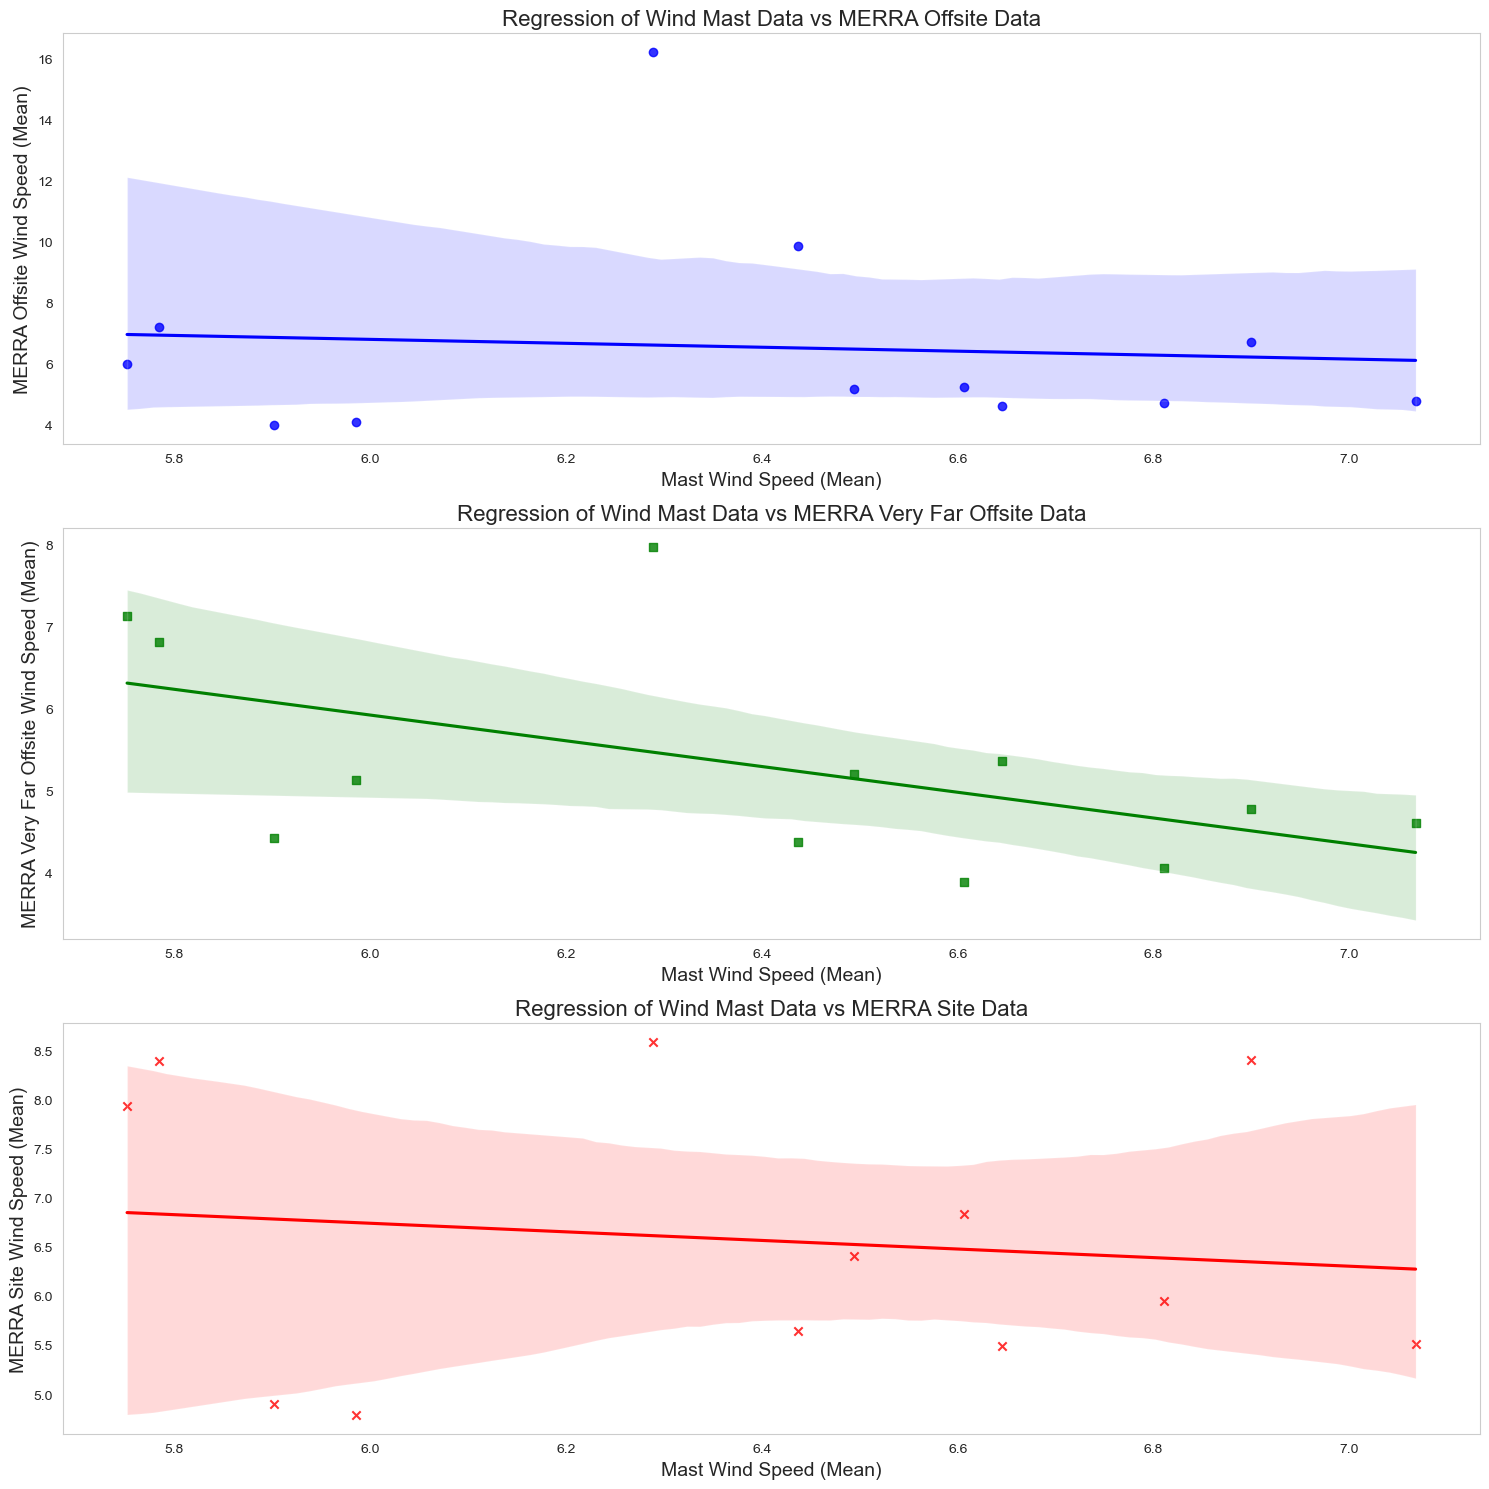

In [418]:
# Step 1: Create the combined DataFrame (if you haven't done so already)
# This step assumes that you have already created the combined_data DataFrame as shown earlier.

# Step 2: Set up the figure size for individual plots
plt.figure(figsize=(15, 15))

# Step 3: Create a regression plot for MERRA offsite data
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.regplot(x=combined_data['M1_WS50_mean'], y=combined_data['MerraOff_WS50_mean'], 
            label='MERRA Offsite', color='blue', marker='o')
plt.xlabel('Mast Wind Speed (Mean)', fontsize=14)
plt.ylabel('MERRA Offsite Wind Speed (Mean)', fontsize=14)
plt.title('Regression of Wind Mast Data vs MERRA Offsite Data', fontsize=16)
plt.grid()

# Step 4: Create a regression plot for MERRA very far offsite data
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
sns.regplot(x=combined_data['M1_WS50_mean'], y=combined_data['MerravfarOff_WS50_mean'], 
            label='MERRA Very Far Offsite', color='green', marker='s')
plt.xlabel('Mast Wind Speed (Mean)', fontsize=14)
plt.ylabel('MERRA Very Far Offsite Wind Speed (Mean)', fontsize=14)
plt.title('Regression of Wind Mast Data vs MERRA Very Far Offsite Data', fontsize=16)
plt.grid()

# Step 5: Create a regression plot for MERRA site data
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
sns.regplot(x=combined_data['M1_WS50_mean'], y=combined_data['Merrasite_WS50_mean'], 
            label='MERRA Site', color='red', marker='x')
plt.xlabel('Mast Wind Speed (Mean)', fontsize=14)
plt.ylabel('MERRA Site Wind Speed (Mean)', fontsize=14)
plt.title('Regression of Wind Mast Data vs MERRA Site Data', fontsize=16)
plt.grid()

# Step 6: Adjust layout
plt.tight_layout()

# Step 7: Show the plot
plt.show()

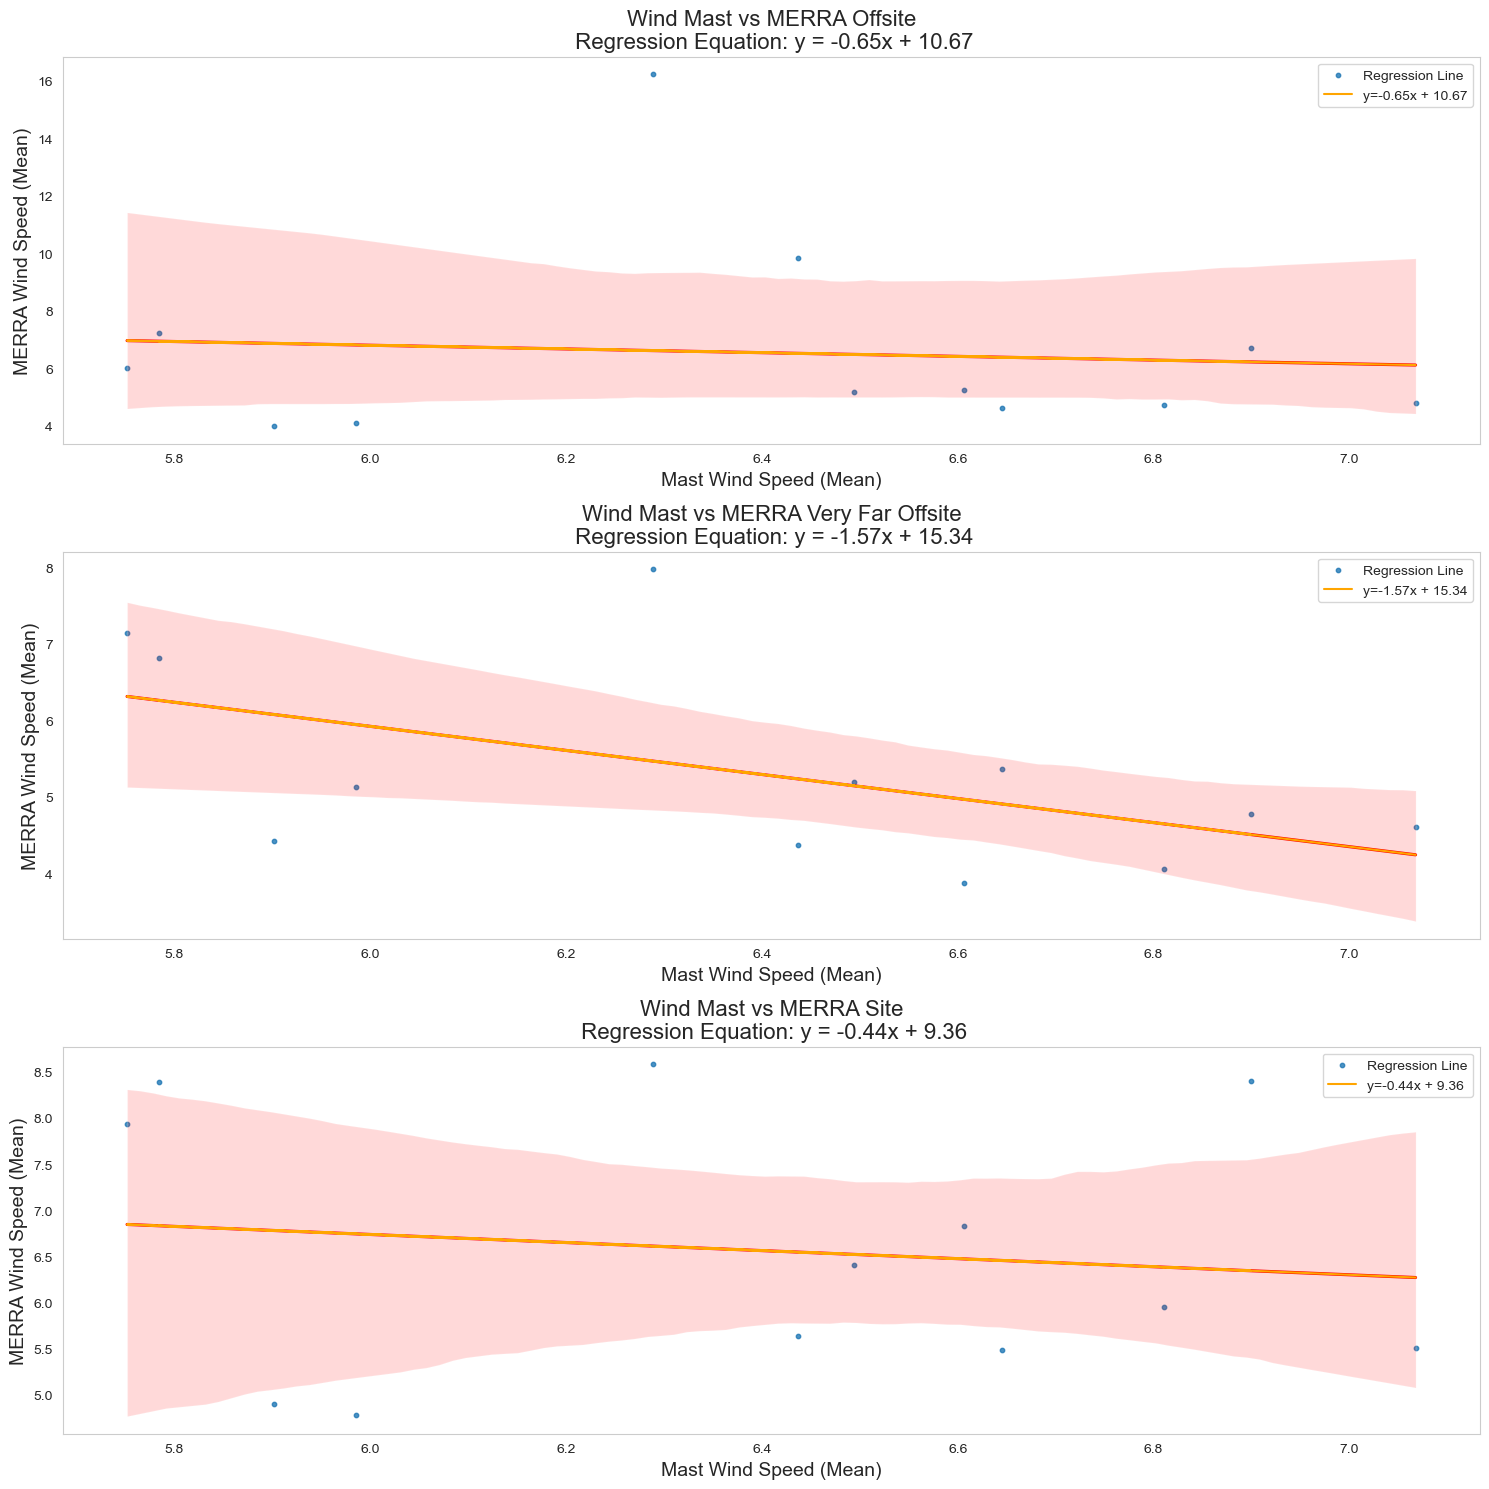

In [419]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming combined_data is already created and includes the relevant columns
# Example: combined_data['M1_WS50_mean'], combined_data['MerraOff_WS50_mean'], etc.

# Step 1: Set up the figure size for individual plots
plt.figure(figsize=(15, 15))

# Function to calculate and plot regression line
def plot_regression(x, y, subplot_index, title):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the model
    model = LinearRegression().fit(x_reshaped, y)
    m = model.coef_[0]  # slope
    c = model.intercept_  # intercept
    
    # Create the regression line
    y_pred = model.predict(x_reshaped)

    # Create subplot
    plt.subplot(3, 1, subplot_index)
    sns.regplot(x=x, y=y, scatter_kws={"s": 10}, line_kws={"color": "red"}, label='Regression Line')
    plt.plot(x, y_pred, color='orange', label=f'y={m:.2f}x + {c:.2f}')
    
    plt.xlabel('Mast Wind Speed (Mean)', fontsize=14)
    plt.ylabel('MERRA Wind Speed (Mean)', fontsize=14)
    plt.title(title + f'\n Regression Equation: y = {m:.2f}x + {c:.2f}', fontsize=16)
    plt.legend()
    plt.grid()

# Step 2: Create a regression plot for MERRA offsite data
plot_regression(combined_data['M1_WS50_mean'], combined_data['MerraOff_WS50_mean'], 1, 'Wind Mast vs MERRA Offsite')

# Step 3: Create a regression plot for MERRA very far offsite data
plot_regression(combined_data['M1_WS50_mean'], combined_data['MerravfarOff_WS50_mean'], 2, 'Wind Mast vs MERRA Very Far Offsite')

# Step 4: Create a regression plot for MERRA site data
plot_regression(combined_data['M1_WS50_mean'], combined_data['Merrasite_WS50_mean'], 3, 'Wind Mast vs MERRA Site')

# Step 5: Adjust layout
plt.tight_layout()

# Step 6: Show the plot
plt.show()